In [1]:
%matplotlib nbagg
import sys
sys.path.append(r'C:\Users\Bluefors\Dropbox (Moler group)\TeamBFLD\software\python\scanning-squid\scanning-squid')
import utils
import numpy as np
from microscope.susceptometer import SusceptometerMicroscope
import logging
import time

In [2]:
#Change log_name
config_file = 'config_susceptometer.json'
m = SusceptometerMicroscope(config_file, 'LT', log_name='TTG device8')

INFO:2021-09-06_13:08:07:microscope:Logging started.
INFO:2021-09-06_13:08:07:microscope:Initializing microscope object using file config_susceptometer.json.
INFO:2021-09-06_13:08:07:atto:Initializing ANC300 controller.
INFO:2021-09-06_13:08:09:microscope:Attocube controller successfully added to microscope.
INFO:2021-09-06_13:08:09:microscope:Lakeshore 372 successfully added to microscope.


Connected to: ver.
Connected to: LSCI 372 (serial:LSA17DZ, firmware:1.3) in 0.12s
Connected to: KEITHLEY INSTRUMENTS INC. 2410 (serial:1370790, firmware:C32   Oct  4 2010 14:20:11/A02  /J/K) in 0.03s


INFO:2021-09-06_13:08:09:microscope:Keithley 2410 successfully added to microscope.
INFO:2021-09-06_13:08:10:scanner:Moved scanner from [0.002, 0.001, 0.002] V to [0.002, 0.001, 0.001] V.
INFO:2021-09-06_13:08:10:microscope:Scanner successfully added to microscope.
INFO:2021-09-06_13:08:10:microscope:Susceptometer(SQUID) successfully added to microscope.
C:\Users\Bluefors\Anaconda3\envs\scanning-squid\lib\site-packages\qcodes\instrument\parameter.py:211: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


Connected to: Stanford_Research_Systems SR830 (serial:s/n37680, firmware:ver1.07) in 0.05s


INFO:2021-09-06_13:08:11:microscope:SUSC_lockin successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n37721, firmware:ver1.07) in 0.04s


INFO:2021-09-06_13:08:11:microscope:CAP_lockin successfully added to microscope.


In [8]:
#Folder must have "config_measurements_susc.json"
log = logging.getLogger()
measurements = utils.load_json_ordered('config_measurements_susc.json')

In [7]:
m.scanner.apply_gate(0)

INFO:2021-09-06_13:26:41:scanner:Changed gate from -3.499 V to 0.001 V.


In [10]:
m.ke2410.volt(0)

INFO:2021-09-06_13:26:59:microscope:Setting amplitude on SUSC_lockin to 0.1 V.
INFO:2021-09-06_13:26:59:microscope:Setting frequency on SUSC_lockin to 17.77 Hz.


<IPython.core.display.Javascript object>


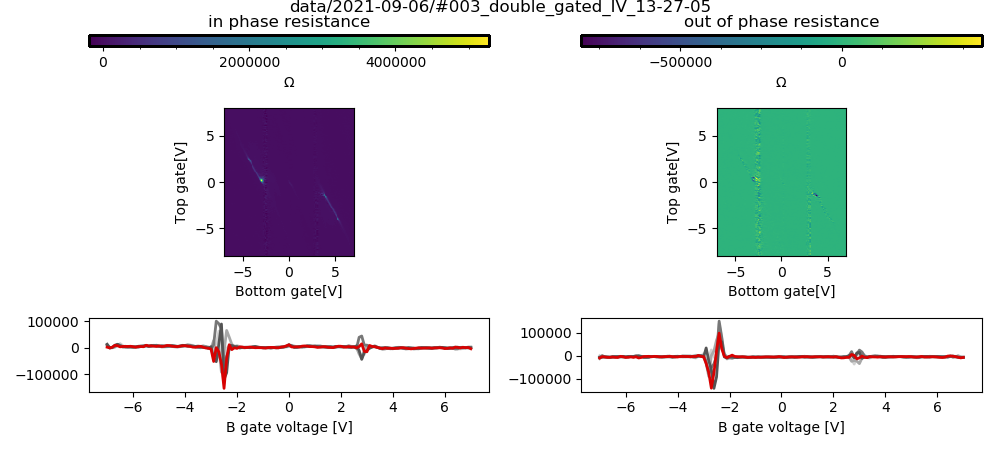

INFO:2021-09-06_13:27:05:microscope:Starting gating sample


Started at 2021-09-06 13:27:06


DataSet:
   location = 'data/2021-09-06/#003_double_gated_IV_13-27-05'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | ke2410_volt_set | volt         | (161,)
   Measured | daq_ai_voltage  | voltage      | (161, 2, 141)
Finished at 2021-09-06 16:40:50


INFO:2021-09-06_16:40:55:scanner:Changed gate from 7.001 V to 0.001 V.


(DataSet:
    location = 'data/2021-09-06/#003_double_gated_IV_13-27-05'
    <Type>   | <array_id>      | <array.name> | <array.shape>
    Setpoint | ke2410_volt_set | volt         | (161,)
    Measured | daq_ai_voltage  | voltage      | (161, 2, 141),
 <plots.DoubleGatedPlot at 0x25ecfa29080>)

In [9]:
# Tc 100ms
# 50mV sensitivity
# high reserve
# source from S10 to S5, measure S8 S7
m.double_gated_IV(measurements["double_gated_IV"])
# forgot to add pre amp 1000 gain so measured R is 1000 times bigger

In [13]:
# taken right after IV
m.SUSC_lockin.snapshot()

{'functions': {'auto_gain': {},
  'auto_reserve': {},
  'auto_phase': {},
  'auto_offset': {},
  'reset': {},
  'disable_front_panel': {},
  'enable_front_panel': {},
  'send_trigger': {},
  'buffer_start': {},
  'buffer_pause': {},
  'buffer_reset': {}},
 'submodules': {},
 '__class__': 'qcodes.instrument_drivers.stanford_research.SR830.SR830',
 'parameters': {'IDN': {'value': {'vendor': 'Stanford_Research_Systems',
    'model': 'SR830',
    'serial': 's/n37680',
    'firmware': 'ver1.07'},
   'ts': '2021-09-06 13:27:02',
   'raw_value': {'vendor': 'Stanford_Research_Systems',
    'model': 'SR830',
    'serial': 's/n37680',
    'firmware': 'ver1.07'},
   '__class__': 'qcodes.instrument.parameter.Parameter',
   'full_name': 'SUSC_lockin_IDN',
   'vals': '<Anything>',
   'inter_delay': 0,
   'post_delay': 0,
   'label': 'IDN',
   'unit': '',
   'instrument': 'qcodes.instrument_drivers.stanford_research.SR830.SR830',
   'instrument_name': 'SUSC_lockin',
   'name': 'IDN'},
  'timeout': {'

In [11]:
m.SUSC_lockin.amplitude(.05)